In [24]:
from statsmodels.formula.api import ols
import pandas as pd
import matplotlib.pyplot as plt

# Daily Regression

- Wanted to know prediction performance show better on specific time period.
- Regression Result focused on date time (9 - 18) which is considered as sun shining hours

In [25]:
day_time = [9,10,11,12,13,14,15,16,17,18]

In [26]:
data = pd.read_csv("combined.csv")

data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d %H:%M:%S")
# data["hour"] = data["date"].dt.hour
data.index = data["date"]
# data = data.drop("date", axis=1)
data = data.fillna(0)

data

,date,temperature,rain,wind_speed,wind_direction,humidity,pressure,total_cloud,visibility,solar_radiation
date,,,,,,,,,,
2017-01-01 00:00:00,2017-01-01 00:00:00,4.2,0.0,2.1,320.0,68.0,1021.5,0.0,20000.0,0.0
2017-01-01 01:00:00,2017-01-01 01:00:00,4.1,0.0,1.9,320.0,67.0,1021.4,0.0,20000.0,0.0
2017-01-01 02:00:00,2017-01-01 02:00:00,3.9,0.0,1.0,250.0,68.0,1021.7,0.0,20000.0,0.0
2017-01-01 03:00:00,2017-01-01 03:00:00,3.7,0.0,1.9,320.0,70.0,1021.6,0.0,20000.0,0.0
2017-01-01 04:00:00,2017-01-01 04:00:00,3.6,0.0,1.1,50.0,72.0,1020.7,0.0,17950.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-10-18 19:00:00,2023-10-18 19:00:00,18.7,0.0,1.8,180.0,72.0,15.5,2.0,4057.0,0.0
2023-10-18 20:00:00,2023-10-18 20:00:00,16.4,0.0,0.7,200.0,84.0,15.6,3.0,3245.0,0.0
2023-10-18 21:00:00,2023-10-18 21:00:00,14.4,0.0,0.5,70.0,88.0,14.4,6.0,2590.0,0.0


In [27]:
selected_data = data[data["date"].dt.hour.isin(day_time)]
selected_data

,date,temperature,rain,wind_speed,wind_direction,humidity,pressure,total_cloud,visibility,solar_radiation
date,,,,,,,,,,
2017-01-01 09:00:00,2017-01-01 09:00:00,3.6,0.0,1.5,230.0,72.0,1022.5,20.0,11230.0,0.15
2017-01-01 10:00:00,2017-01-01 10:00:00,5.7,0.0,1.3,200.0,65.0,1022.8,20.0,18210.0,0.63
2017-01-01 11:00:00,2017-01-01 11:00:00,6.3,0.0,1.7,90.0,67.0,1022.3,0.0,12830.0,0.94
2017-01-01 12:00:00,2017-01-01 12:00:00,8.1,0.0,1.3,160.0,57.0,1021.4,0.0,18670.0,1.29
2017-01-01 13:00:00,2017-01-01 13:00:00,8.8,0.0,1.0,110.0,55.0,1020.4,0.0,20000.0,1.41
...,...,...,...,...,...,...,...,...,...,...
2023-10-18 14:00:00,2023-10-18 14:00:00,23.2,0.0,2.0,230.0,46.0,13.0,4.0,5000.0,2.49
2023-10-18 15:00:00,2023-10-18 15:00:00,22.8,0.0,1.3,230.0,46.0,12.7,6.0,5000.0,1.93
2023-10-18 16:00:00,2023-10-18 16:00:00,22.3,0.0,2.0,180.0,51.0,13.7,6.0,4918.0,1.33


# Rain Regression

- Assumed that raining means lower or no solar radiation
- Wanted to look at it

In [28]:
rain_data = selected_data[selected_data["rain"]>0]
rain_data

,date,temperature,rain,wind_speed,wind_direction,humidity,pressure,total_cloud,visibility,solar_radiation
date,,,,,,,,,,
2017-01-20 15:00:00,2017-01-20 15:00:00,1.0,0.1,11.0,320.0,47.0,1012.4,20.0,20000.0,1.14
2017-01-29 09:00:00,2017-01-29 09:00:00,5.6,4.2,5.9,90.0,85.0,1011.3,100.0,8350.0,0.04
2017-01-29 12:00:00,2017-01-29 12:00:00,6.2,1.8,5.1,70.0,82.0,1009.6,100.0,19130.0,0.20
2017-02-20 12:00:00,2017-02-20 12:00:00,8.3,0.2,8.9,340.0,21.0,1002.9,40.0,20000.0,1.11
2017-02-22 09:00:00,2017-02-22 09:00:00,5.0,0.9,7.3,70.0,73.0,1011.3,100.0,10860.0,0.06
...,...,...,...,...,...,...,...,...,...,...
2023-10-03 13:00:00,2023-10-03 13:00:00,18.7,0.1,0.5,360.0,77.0,16.5,9.0,3675.0,0.51
2023-10-03 14:00:00,2023-10-03 14:00:00,19.5,0.1,1.0,110.0,76.0,17.2,10.0,5000.0,0.76
2023-10-03 16:00:00,2023-10-03 16:00:00,17.6,0.6,1.0,360.0,87.0,17.5,9.0,1658.0,0.19


In [29]:
train_size = round(len(selected_data) * 0.7)

day_train, day_test = selected_data[:train_size], selected_data[train_size:]
rain_day_train, rain_day_test = rain_data[:train_size], rain_data[train_size:]

day_train

,date,temperature,rain,wind_speed,wind_direction,humidity,pressure,total_cloud,visibility,solar_radiation
date,,,,,,,,,,
2017-01-01 09:00:00,2017-01-01 09:00:00,3.6,0.0,1.5,230.0,72.0,1022.5,20.0,11230.0,0.15
2017-01-01 10:00:00,2017-01-01 10:00:00,5.7,0.0,1.3,200.0,65.0,1022.8,20.0,18210.0,0.63
2017-01-01 11:00:00,2017-01-01 11:00:00,6.3,0.0,1.7,90.0,67.0,1022.3,0.0,12830.0,0.94
2017-01-01 12:00:00,2017-01-01 12:00:00,8.1,0.0,1.3,160.0,57.0,1021.4,0.0,18670.0,1.29
2017-01-01 13:00:00,2017-01-01 13:00:00,8.8,0.0,1.0,110.0,55.0,1020.4,0.0,20000.0,1.41
...,...,...,...,...,...,...,...,...,...,...
2021-01-11 16:00:00,2021-01-11 16:00:00,1.2,0.0,0.3,0.0,51.0,3.4,10.0,1998.0,0.36
2021-01-11 17:00:00,2021-01-11 17:00:00,1.1,0.0,1.1,320.0,56.0,3.7,9.0,1999.0,0.20
2021-01-11 18:00:00,2021-01-11 18:00:00,0.5,0.0,1.2,360.0,54.0,3.4,10.0,2000.0,0.02


In [30]:
# 9~18시 사이 전체 데이터에 대한 다중 회귀
formula = "solar_radiation ~ temperature * wind_direction * visibility * rain * total_cloud * humidity"

day_model = ols(formula, data=day_train)
day_model=day_model.fit()
print("DayTime With all attributes [Adj R2]: {}".format(day_model.rsquared_adj))

DayTime With all attributes [Adj R2]: 0.45624543571240217


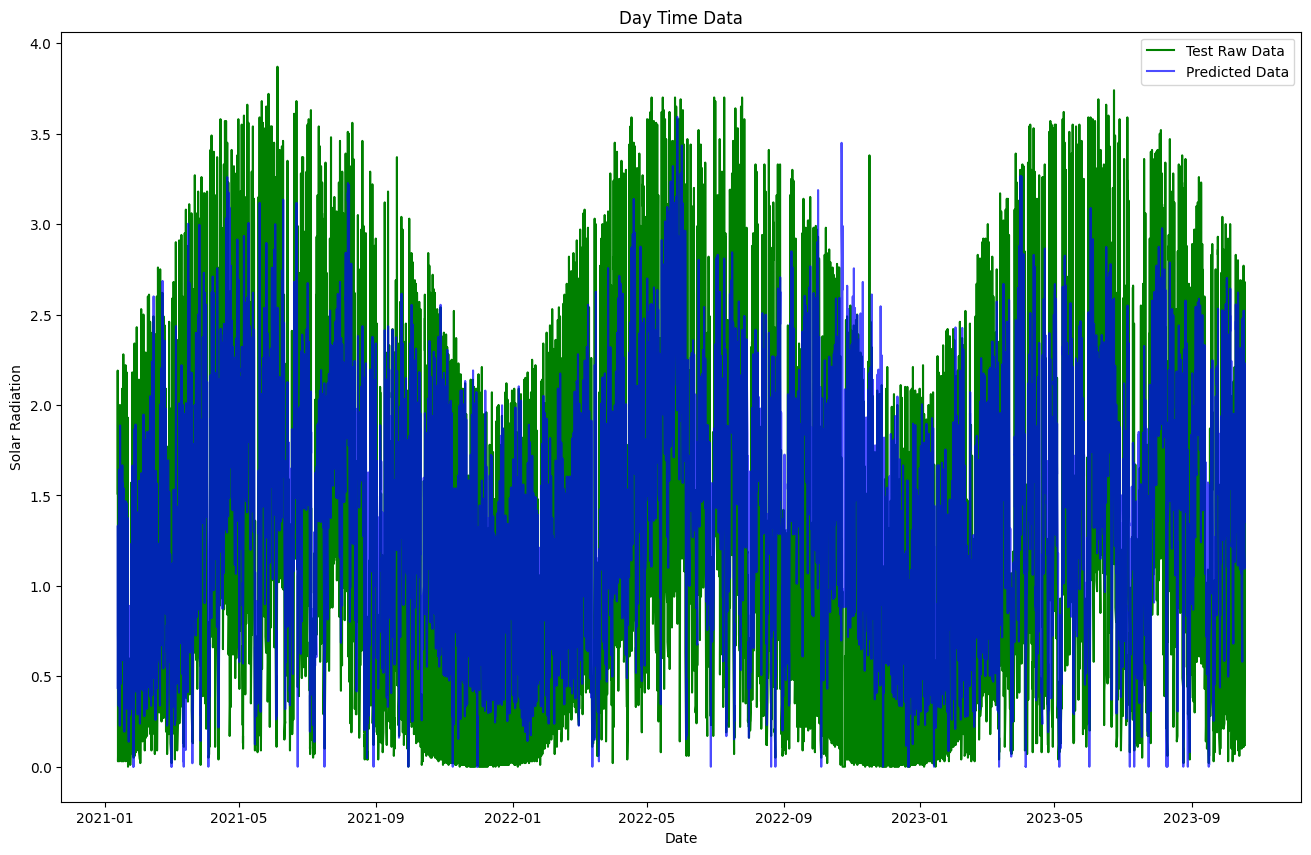

In [44]:
day_prediction = day_model.predict(day_test)
day_prediction = day_prediction.apply(lambda x: 0 if x < 0 else x)

plt.figure(figsize=(16,10))
plt.title("Day Time Data")
plt.plot(day_test["solar_radiation"], label="Test Raw Data", c="g")
plt.plot(day_prediction, label="Predicted Data", c="blue", alpha=.7)
plt.legend(loc="best")
plt.xlabel("Date")
plt.ylabel("Solar Radiation")
plt.savefig("./graph/day_time.jpeg")
plt.show()

In [32]:
# 9~18시 중, 상관계수 0.1보다 큰 어트리뷰트들만
formula2 = "solar_radiation ~ temperature * wind_direction * rain * total_cloud * humidity"

day_model2 = ols(formula2, data=day_train)
day_model2=day_model2.fit()
print("DayTime with pearson value over 0.1 [Adj R2]: {}".format(day_model2.rsquared_adj))

DayTime with pearson value over 0.1 [Adj R2]: 0.43670951836748495


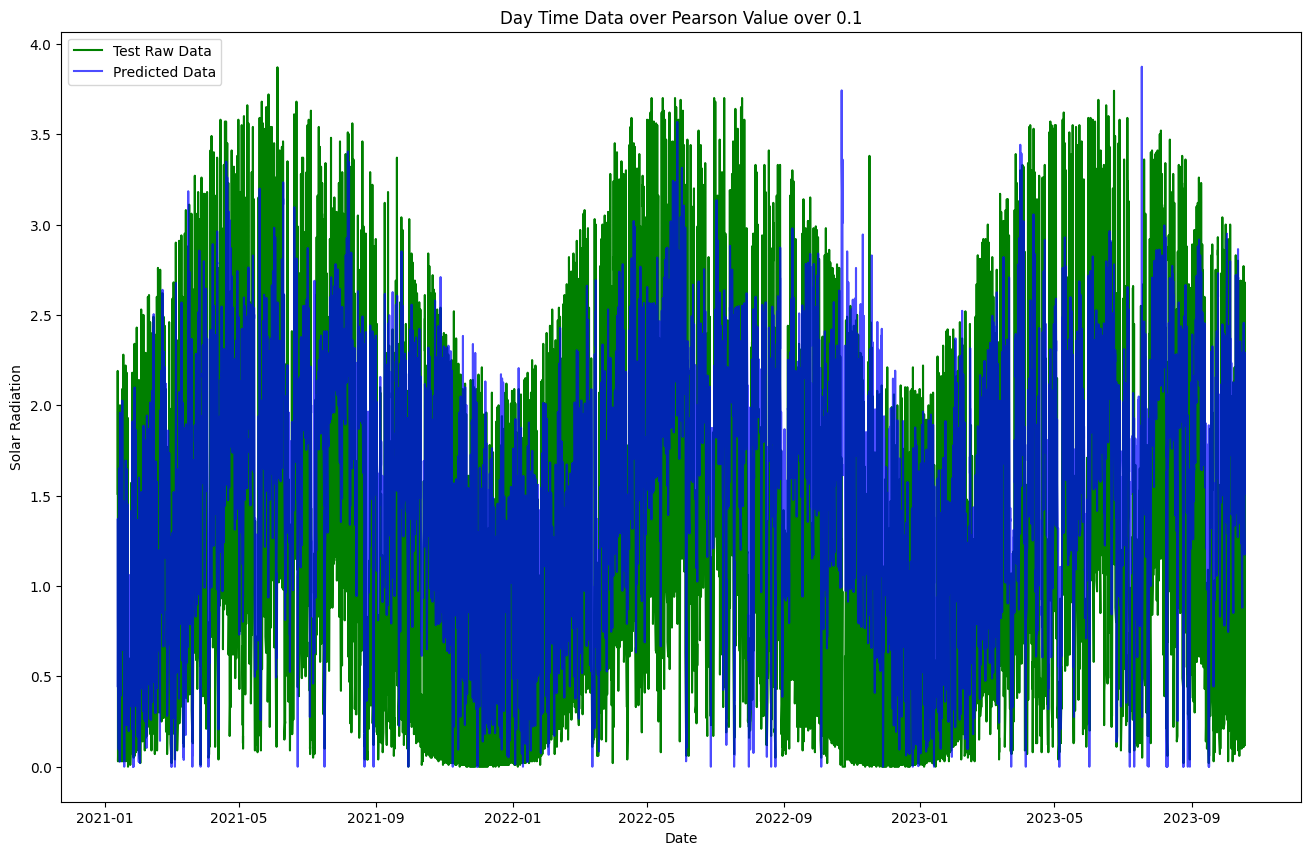

In [43]:
day_prediction2 = day_model2.predict(day_test)
day_prediction2 = day_prediction2.apply(lambda x: 0 if x < 0 else x)

plt.figure(figsize=(16,10))
plt.title("Day Time Data over Pearson Value over 0.1")
plt.plot(day_test["solar_radiation"], label="Test Raw Data", c="g")
plt.plot(day_prediction2, label="Predicted Data", c="blue", alpha=.7)
plt.legend(loc="best")
plt.xlabel("Date")
plt.ylabel("Solar Radiation")
plt.savefig("./graph/day_time_pearson_0.1.jpeg")
plt.show()

In [34]:
# 9~18 사이에 비가 내린 날, 0.1보다 큰 어트리뷰트
formula3 = "solar_radiation ~ temperature * wind_speed * rain * pressure * total_cloud * humidity"

day_model3 = ols(formula3, data=rain_day_train)
day_model3 = day_model3.fit()

print("DayTime on Rainy day[Adj R2]: {}".format(day_model3.rsquared_adj))

DayTime on Rainy day[Adj R2]: 0.43958480427062785


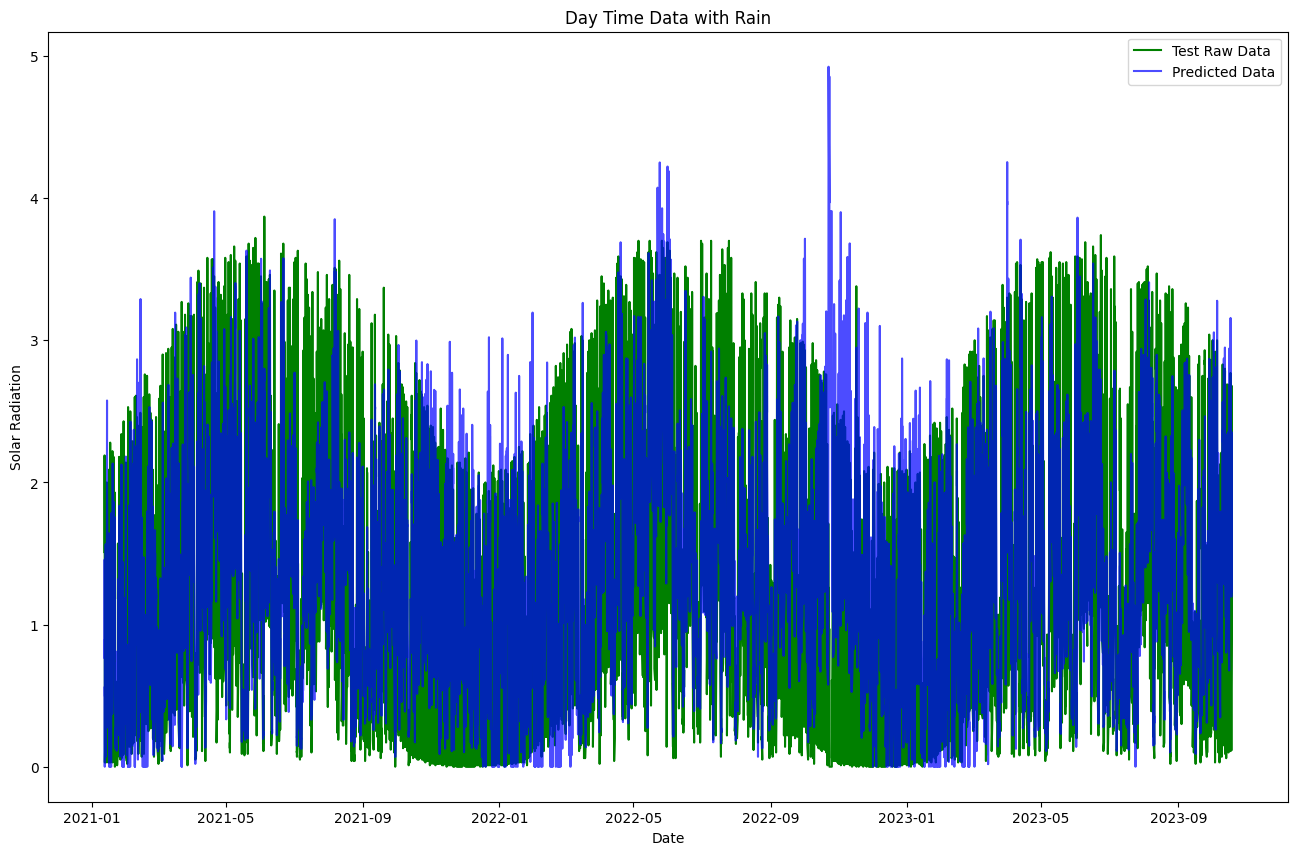

In [45]:
day_prediction3 = day_model3.predict(day_test)
day_prediction3 = day_prediction3.apply(lambda x: 0 if x < 0 else x)

plt.figure(figsize=(16,10))
plt.title("Day Time Data with Rain")
plt.plot(day_test["solar_radiation"], label="Test Raw Data", c="g")
plt.plot(day_prediction3, label="Predicted Data", c="blue", alpha=.7)
plt.legend(loc="best")
plt.xlabel("Date")
plt.ylabel("Solar Radiation")
plt.savefig("./graph/day_time_rain.jpeg")
plt.show()

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(day_test["solar_radiation"], day_prediction)
mse = mean_squared_error(day_test["solar_radiation"], day_prediction)
rmse = np.sqrt(mse)

mae2 = mean_absolute_error(day_test["solar_radiation"], day_prediction2)
mse2 = mean_squared_error(day_test["solar_radiation"], day_prediction2)
rmse2 = np.sqrt(mse2)

mae3 = mean_absolute_error(day_test["solar_radiation"], day_prediction3)
mse3 = mean_squared_error(day_test["solar_radiation"], day_prediction3)
rmse3 = np.sqrt(mse3)

pd.DataFrame(
    columns=["MAE", "MSE", "RMSE"],
    index=["DayTimeTotal", "DayTimeCorrOver0.1", "DayTimeWithRain"],
    data=[[mae, mse, rmse], [mae2, mse2, rmse2], [mae3, mse3, rmse3]]
)

,MAE,MSE,RMSE
DayTimeTotal,0.589495,0.520242,0.721278
DayTimeCorrOver0.1,0.641190,0.603504,0.776855
DayTimeWithRain,0.625600,0.696021,0.834278
